<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_53_Stochastic_Gradient_Descent/Lecture_53_stochastic_gradient_descent_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Import necessary libraries for regression and plotting

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Configure matplotlib to use the 'notebook' backend for interactive plots.

%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [39]:
# Generate synthetic regression data.

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

In [55]:
# Plot the generated scatter plot of the data.

plt.scatter(X,y)
plt.show()


In [41]:
# Create a Linear Regression model using scikit-learn

lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [42]:
# Import the time library for measuring execution time.

import time

# Initialize parameters for gradient descent
b = 150
m = -127.82

# Lists to store the history of parameters, cost, and learning rate.

all_b = []
all_m = []
all_cost = []
all_lr = []

# Define the number of epochs for gradient descent.
epochs = 1

# Record the start time.
start = time.time()

# Parameters for the learning rate decay function.

t0,t1 = 5,50

# Define a function for time-based learning rate decay.
def learning_rate(t):
    return t0/(t + t1)

# Perform gradient descent.

for i in range(epochs):
    for j in range(X.shape[0]):

         # Calculate the learning rate for the current iteration.
        lr = learning_rate(i * X.shape[0] + j)

        # Select a random data point index for stochastic gradient descent.
        idx = np.random.randint(X.shape[0], size=1)

        # Calculate the gradients of the cost function with respect to b (intercept) and m (slope).
        slope_b = -2 * (y[idx] - (m * X[idx]) -  b)
        slope_m = -2 * (y[idx] - (m * X[idx]) -  b) * X[idx]

         # Calculate the cost (mean squared error) for the current data point.
        cost = (y[idx] - m * X[idx] -b) ** 2

        # Update the parameters b and m using the gradients and learning rate.
        b = b - (lr * slope_b)
        m = m - (lr * slope_m)

        # Store the updated parameters, cost, and learning rate.

        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)
# Print the total time taken for gradient descent
print("Total time taken",time.time() - start)

Total time taken 0.010091304779052734


In [43]:
# Print the number of cost values recorded during gradient descent.

len(all_cost)

100

In [44]:
# Create a figure and axes for the animation.

fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

# Define the update function for the animation. This function will be called for each frame.
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

# Create the animation object
anim = FuncAnimation(fig, update, frames=100, interval=5)

# Define the filename for the output GIF.

f = r"stochastic_animation_line_plot.gif"

# Create a PillowWriter object to save the animation as a GIF.

writergif = animation.PillowWriter(fps=2)

# Save the animation to the specified file using the writer.
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>



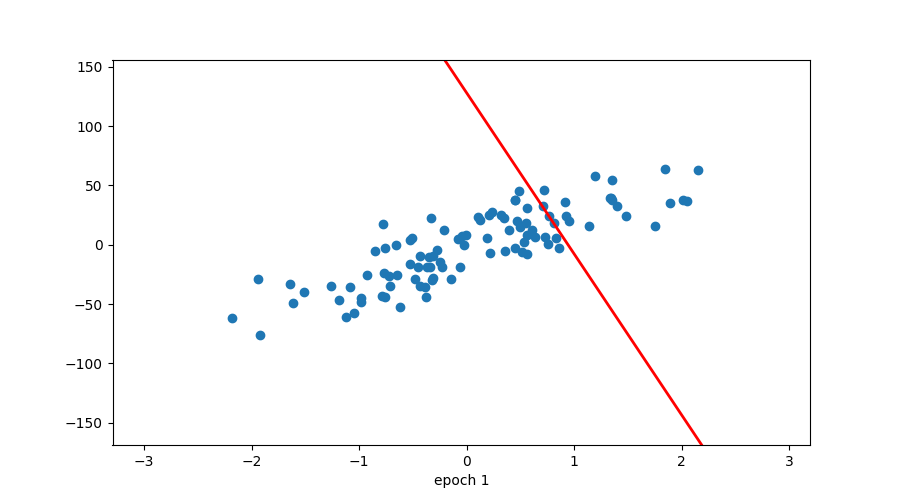



In [45]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*X.reshape(100) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

In [46]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150))

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white')

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i])
    ydata.append(all_b[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 100)

#f = r"stochastic_animation_contour_plot.gif"
#writergif = animation.PillowWriter(fps=2)
#anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

In [47]:
all_b[-1]

array([[-1.39362719]])

In [48]:
all_m[-1]

array([[31.97570205]])

In [49]:
num_epochs = list(range(0,100))
fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim =(0, 31), ylim =(0, 175000))

line, = axis.plot([], [], lw = 2)

xdata, ydata = [], []

# animation function
def animate(i):
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i])
    ydata.append(all_cost[i])
    line.set_data(xdata, ydata)
    axis.set_xlabel(label)

    return line,

# calling the animation function
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 150)

f = r"stochastic_animation_cost_plot.gif"
writergif = animation.PillowWriter(fps=2)
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


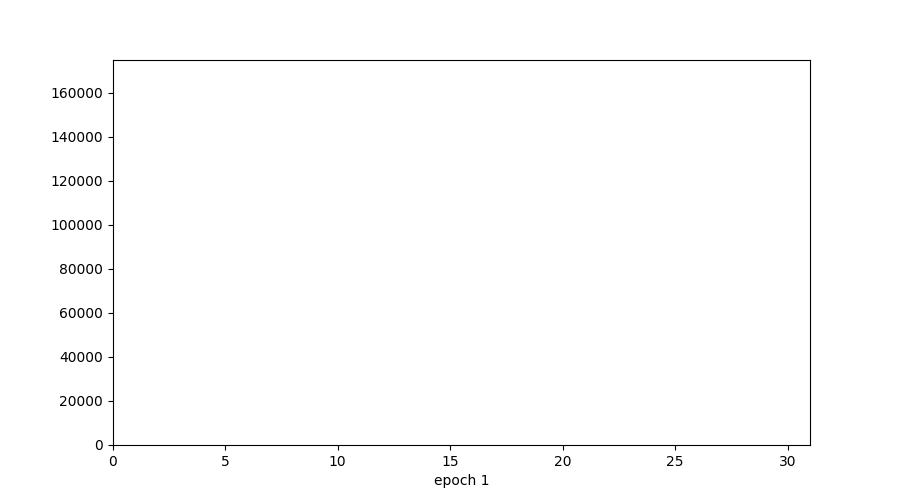

In [50]:
import numpy as np
import matplotlib.pyplot as plt


fig,ax=plt.subplots(1,1)
plt.figure(figsize=(18,4))
cp = ax.contourf(m_arr, b_arr, z_arr)
ax.plot(np.array(all_m).ravel(),np.array(all_b).ravel(),color='white')
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('m')
ax.set_ylabel('b')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
all_lr[0]

0.1

In [52]:
all_lr[-1]

0.03355704697986577